In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("dna2.csv")

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 749 entries, 0 to 748
Columns: 181 entries, A0 to class
dtypes: int64(181)
memory usage: 1.0 MB
None


In [4]:
df.isnull().sum()

A0       0
A1       0
A2       0
A3       0
A4       0
        ..
A176     0
A177     0
A178     0
A179     0
class    0
Length: 181, dtype: int64

In [5]:
y = df["class"]
X = df.drop(['class'], axis=1)

In [6]:
X.head()

A0  A1  A2  A3  A4  A5  A6  A7  A8  A9  ...  A170  A171  A172  A173  A174  \
0   0   1   0   0   0   0   1   0   0   0  ...     0     1     0     0     0   
1   0   0   1   0   0   1   0   0   0   0  ...     0     0     0     0     1   
2   0   0   1   0   0   1   0   1   0   0  ...     0     0     1     0     0   
3   0   0   0   0   0   0   0   1   0   0  ...     0     0     0     1     0   
4   0   1   0   0   0   0   0   1   0   0  ...     0     0     1     0     0   

   A175  A176  A177  A178  A179  
0     0     1     1     0     0  
1     0     0     0     1     0  
2     0     1     0     0     1  
3     0     1     0     0     1  
4     1     0     1     0     0  

[5 rows x 180 columns]

In [7]:
x=(X-np.min(X))/(np.max(X)-np.min(X))

In [8]:
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
x=Scaler.fit_transform(x)

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=1)
print("x_train:",x_train.shape)
print("y_train:",y_train.shape)
print("x_test:",x_test.shape)
print("y_test:",y_test.shape)

x_train: (599, 180)
y_train: (599,)
x_test: (150, 180)
y_test: (150,)


In [10]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
scores=[]

kf=KFold(n_splits=10,random_state=1)
mlpc=MLPClassifier(solver="lbfgs",activation="logistic",hidden_layer_sizes=(3,5))

for train_indexler,test_indexler in kf.split(x):
    mlpc.fit(x[train_indexler],y[train_indexler])
    score=mlpc.score(x[test_indexler],y[test_indexler])
    scores.append(score)
    print(score)
    
print("ortalama score:",np.mean(scores))

mlpc=MLPClassifier(random_state=1)
mlpc.fit(x_train,y_train)
y_pred=mlpc.predict(x_test)

C:\Users\Esra\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
C:\Users\Esra\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.8


C:\Users\Esra\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.8533333333333334


C:\Users\Esra\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.7866666666666666


C:\Users\Esra\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.92


C:\Users\Esra\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.8933333333333333
0.92
0.8933333333333333


C:\Users\Esra\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.8266666666666667


C:\Users\Esra\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.8533333333333334
0.7702702702702703
ortalama score: 0.8516936936936936


In [11]:
print("mlpc score:",mlpc.score(x_test,y_test))

mlpc score: 0.9133333333333333


In [12]:
from sklearn.model_selection import GridSearchCV

mlpc_params={"alpha":[0.1,0.01,0.001,0.0001],
            "hidden_layer_sizes":[(10,10),(3,3,3),(100,100),(3,5,3)],
            "solver":["lbfgs","adam","sgd"]}

mlpc=MLPClassifier(activation="logistic",random_state=1)

mlpc_cv_model=GridSearchCV(mlpc,mlpc_params,cv=10,n_jobs=-1,verbose=2).fit(x_train,y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   48.9s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed: 12.8min finished


In [13]:
print(mlpc_cv_model.best_params_)

{'alpha': 0.1, 'hidden_layer_sizes': (100, 100), 'solver': 'lbfgs'}


In [14]:
mlpc_tuned=MLPClassifier(alpha=0.01,hidden_layer_sizes=(100,100),solver="adam").fit(x_train,y_train)
print("score:",mlpc_tuned.score(x_test,y_test))

score: 0.8466666666666667


In [15]:
import sklearn.metrics as metrics

In [16]:
acc=metrics.accuracy_score(y_test,y_pred)
print("Accuracy:",acc)

Accuracy: 0.9133333333333333


In [17]:
cm=metrics.confusion_matrix(y_test,y_pred)
print(cm)

[[32  1  5]
 [ 3 28  0]
 [ 0  4 77]]


<AxesSubplot:>

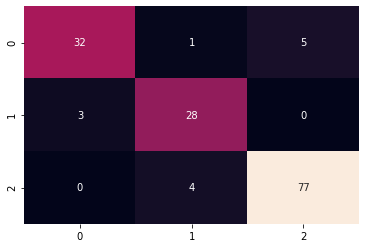

In [18]:
sns.heatmap(cm,cbar=False,annot=True,fmt="")

<AxesSubplot:>

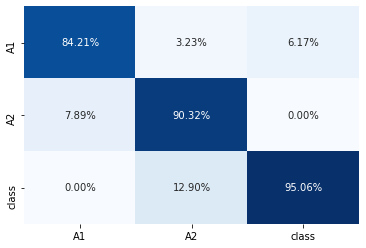

In [19]:
class_adlari=["A1","A2","class"]
sns.heatmap(cm/cm.sum(axis=1), annot=True, cbar=False, cmap="Blues",xticklabels=class_adlari,yticklabels=class_adlari,fmt=".2%")

In [21]:
f1=metrics.f1_score(y_test,y_pred,average='weighted')
print("f1 score:",f1)

f1 score: 0.9131178390340926


In [22]:
cr=metrics.classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           1       0.91      0.84      0.88        38
           2       0.85      0.90      0.88        31
           3       0.94      0.95      0.94        81

    accuracy                           0.91       150
   macro avg       0.90      0.90      0.90       150
weighted avg       0.91      0.91      0.91       150



In [102]:
print(mt.classification_report(actual, predicted))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       147
           1       0.90      0.83      0.86       183

    accuracy                           0.85       330
   macro avg       0.85      0.85      0.85       330
weighted avg       0.86      0.85      0.85       330

